# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


In [48]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample
# from torchvision import transforms
from PIL import Image
import numpy as np
import nltk

import os
from datetime import datetime

# Create GAN_Images directory
output_dir = "GAN_Images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# nltk.download('wordnet')
# nltk.download('omw-1.4')  # These need downloaded once

# Load pretrained BigGAN model
# BigGAN is a generative adversarial network trained on ImageNet dataset
# The 'biggan-deep-256' model generates 256x256 pixel images
model = BigGAN.from_pretrained('biggan-deep-256')

# Generate random latent vector (noise)
# This is the "seed" that the model uses to generate unique images
# 128 is the dimensionality of the latent space for BigGAN
latent_vector = torch.randn(1, 128) #The creative spark for our artist, our Generator
# Kind of like asking an artist to paint something, say a cat, but we give 128 different instructions
# That are all very similar, but not quite the same. Kind of like the DNA of the cat, or the image.

# Choose a class label - you can use a class name or index
# BigGAN is a conditional model, meaning it generates images of specific classes
# Here is an example, "Egyptian cat" - I can use any class name from ImageNet.
# Some others include "golden retriever", "airplane", etc.
#class_name = "Egyptian cat"
class_name = "coffee"
# Convert the class name to a one-hot encoded vector that the model can understand
class_vector = torch.from_numpy(one_hot_from_names([class_name], batch_size=1))
# Set truncation value (controls diversity vs quality trade-off)
# Lower values (0.1-0.5) = higher quality but less diversity
# Higher values (0.5-1.0) = more diversity but potentially lower quality
truncation = 0.2 # This is a hyperparameter. We use this
# to adjust how adventorous we want our artist to be. 0.4 is fairly conservative.

# Generate image
# torch.no_grad() disables gradient computation to save memory during inference
with torch.no_grad():
    generated_image = model(latent_vector, class_vector, truncation)

# Convert the tensor to a displayable image
# Remove the batch dimension (squeeze) and move tensor to CPU for numpy conversion
# generated_image = generated_image.squeeze().cpu().numpy() #This just allows us to use numpy basically, and other python tools / libraries
#
#
# # Normalize from [-1,1] to [0,1] (BigGAN outputs values in range [-1,1])
# generated_image = (generated_image + 1) / 2
# # Change from CHW (Channels, Height, Width) to HWC (Height, Width, Channels) format for PIL
# generated_image = np.transpose(generated_image, (1, 2, 0))
# # Convert from float [0,1] to uint8 [0,255] for image display
# generated_image = (generated_image * 255).astype('uint8')

#### SWITCHING TO THE NEW METHOD
# Convert tensor to displayable image (alternative approach)
# Remove batch dimension and reorder dimensions from CHW to HWC in one step using permute
generated_image = generated_image.squeeze().permute(1, 2, 0).cpu().numpy()
# Normalize and convert to uint8 in one step (mathematically equivalent to the previous approach)
generated_image = ((generated_image + 1) / 2 * 255).astype('uint8')

# Display the image
# Create PIL Image object and show it
img = Image.fromarray(generated_image)
img.show()

# Save the image with timestamp and class name
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
#filename = f"egyptian_cat_{timestamp}.png"
filename = f"coffee_{timestamp}.png"
filepath = os.path.join(output_dir, filename)
img.save(filepath)
print(f"Saved image: {filepath}")



Saved image: GAN_Images\coffee_20250523_193632.png


Saved image: GAN_Images\golden_retriever_20250523_193510.png


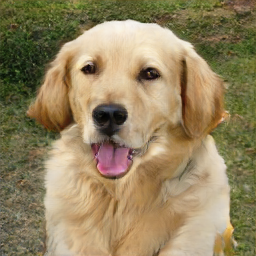

In [44]:
# Experiment with different latent vectors
# truncated_noise_sample generates noise with truncation applied for better quality
# This is an alternative way to generate the latent vector with built-in truncation
latent_vector = torch.from_numpy(truncated_noise_sample(truncation=0.3, batch_size=1))

# Generate one-hot vector for a different class (golden retriever)
# This demonstrates how to change the class of generated image
class_vector = torch.from_numpy(one_hot_from_names(['golden retriever'], batch_size=1))

# Truncation value - same as before, controls quality vs diversity trade-off
truncation = 1.000

# Generate image using the new latent vector and class
with torch.no_grad():
    generated_image = model(latent_vector, class_vector, truncation)

# Convert tensor to displayable image (alternative approach)
# Remove batch dimension and reorder dimensions from CHW to HWC in one step using permute
generated_image = generated_image.squeeze().permute(1, 2, 0).cpu().numpy()
# Normalize and convert to uint8 in one step (mathematically equivalent to the previous approach)
generated_image = ((generated_image + 1) / 2 * 255).astype('uint8')



# Create PIL Image object from the NEW generated image
img_dog = Image.fromarray(generated_image)
img_dog.show()  # Display the golden retriever

# Save the golden retriever image
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"golden_retriever_{timestamp}.png"
filepath = os.path.join(output_dir, filename)
img_dog.save(filepath)  # Save the dog image, not the old 'img'
print(f"Saved image: {filepath}")

#print(f"Saved image: {filepath}")
# Create and display the PIL Image
# Note: This doesn't call .show() so it will only display in Jupyter notebooks
Image.fromarray(generated_image)


## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?